In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.9.0'

In [4]:
tf.__version__

'2.9.1'

### Example 1

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

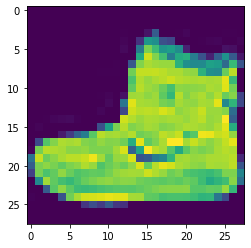

In [6]:
plt.imshow(X_train[0])

In [7]:
y_train[0]

9

##### Label	Description
* 0	    T-shirt/top
* 1	    Trouser
* 2	    Pullover
* 3	    Dress
* 4	    Coat
* 5	    Sandal
* 6	    Shirt
* 7	    Sneaker
* 8	    Bag
* 9	    Ankle boot

In [8]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_name[y_train[0]]

'Ankle boot'

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

##### To Normalize Pixel values

In [11]:
X_train_n = X_train/255
X_test_n = X_test/255

In [12]:
X_train_n[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
print(X_train_n.shape)
print(y_train.shape)
print(X_test_n.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### split
* training data - for training model
* validation data - for hyperparameter tuning
* test data - for test model

In [14]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test_n

In [15]:
print("X_valid : ", X_valid.shape)
print("y_valid : ", y_valid.shape)
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ",  X_test.shape)

X_valid :  (5000, 28, 28)
y_valid :  (5000,)
X_train :  (55000, 28, 28)
y_train :  (55000,)
X_test :  (10000, 28, 28)


#### Model Architecture
* Sequential model API
* Functional API

In [16]:
np.random.seed(50)
tf.random.set_seed(50)

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28])) #1st i/p layer
model.add(keras.layers.Dense(300, activation="relu")) #2nd hidden layer with 300 neurons
model.add(keras.layers.Dense(100, activation="relu")) #3rd hidden layer with 100 newron
model.add(keras.layers.Dense(10, activation="softmax")) #4th o/p layer

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### how this neural network looks like

In [19]:
import pydot
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [20]:
weights, biases = model.layers[1].get_weights()

In [21]:
weights

array([[ 0.06576201, -0.04914269,  0.00096661, ...,  0.0651318 ,
         0.05588472,  0.0466601 ],
       [-0.06763463, -0.03657489,  0.04651227, ...,  0.06411633,
        -0.07358228, -0.06734485],
       [-0.02266569,  0.00460225,  0.04659034, ...,  0.07085481,
        -0.05355682, -0.03729332],
       ...,
       [ 0.05013792, -0.05937459,  0.0361096 , ..., -0.0524639 ,
        -0.07408459, -0.02616028],
       [ 0.03949948, -0.06802096, -0.05456859, ...,  0.07285774,
        -0.01218222,  0.06814401],
       [-0.06680883,  0.00113332,  0.05371693, ..., -0.06296772,
         0.03635902, -0.06184549]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

#### Setting up learning processes

In [25]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

#### Fitting X_train and y_train data

In [26]:
model_history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7221 - accuracy: 0.7610 - val_loss: 0.5177 - val_accuracy: 0.8220
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4896 - accuracy: 0.8279 - val_loss: 0.4464 - val_accuracy: 0.8462
Epoch 3/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4438 - accuracy: 0.8444 - val_loss: 0.4419 - val_accuracy: 0.8464
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4162 - accuracy: 0.8521 - val_loss: 0.4058 - val_accuracy: 0.8586
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3967 - accuracy: 0.8588 - val_loss: 0.4007 - val_accuracy: 0.8618
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3791 - accuracy: 0.8657 - val_loss: 0.3695 - val_accuracy: 0.8722
Epoch 7/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3657 - accuracy: 0.8696 - val_loss: 0.3782 - val_accuracy:

In [27]:
model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

In [28]:
model_history.history

{'loss': [0.7220650315284729,
  0.4896458387374878,
  0.4438323378562927,
  0.41616129875183105,
  0.39671066403388977,
  0.37913939356803894,
  0.36569446325302124,
  0.355613112449646,
  0.34480056166648865,
  0.33645111322402954,
  0.32762858271598816,
  0.31960025429725647,
  0.3124428689479828,
  0.306143194437027,
  0.29925617575645447,
  0.29423078894615173,
  0.28803080320358276,
  0.28196200728416443,
  0.2777722477912903,
  0.27233269810676575,
  0.2672647535800934,
  0.2621464133262634,
  0.25764063000679016,
  0.2533150315284729,
  0.24988751113414764,
  0.2453133910894394,
  0.24161767959594727,
  0.2379600554704666,
  0.23476900160312653,
  0.22950735688209534,
  0.22742953896522522,
  0.2224421352148056,
  0.21825459599494934,
  0.21518540382385254,
  0.21286708116531372,
  0.21028299629688263,
  0.20590722560882568,
  0.20319156348705292,
  0.2003938853740692,
  0.19691674411296844,
  0.19432444870471954,
  0.19090573489665985,
  0.1876537799835205,
  0.1852795332670211

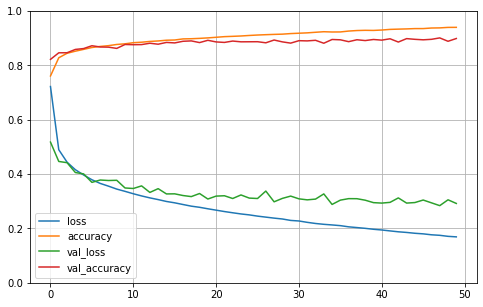

In [29]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3222 - accuracy: 0.8918


[0.3222039043903351, 0.8917999863624573]

#### Saving 1st 3 records

In [31]:
X_new = X_test[:3]

In [32]:
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [33]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 188ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 13ms/step


array([9, 2, 1], dtype=int64)

In [35]:
np.array(class_name)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


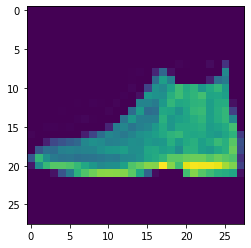

In [36]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


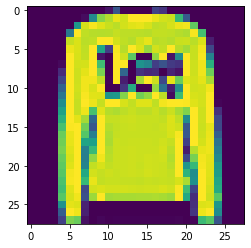

In [37]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


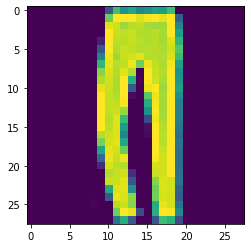

In [38]:
print(plt.imshow(X_test[2]))

In [39]:
X_new1 = X_test[1200:1203]

In [40]:
X_new1

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.17647059,
         0.08235294, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [41]:
y_proba = model.predict(X_new1)
y_proba.round(2)

1/1 [==============================] - 0s 16ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [42]:
y_pred = np.argmax(model.predict(X_new1), axis=-1)
y_pred

1/1 [==============================] - 0s 17ms/step


array([5, 1, 1], dtype=int64)

AxesImage(54,36;334.8x217.44)


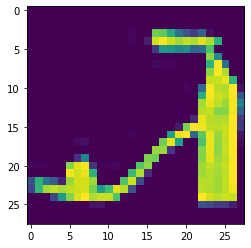

In [43]:
print(plt.imshow(X_test[1200]))

AxesImage(54,36;334.8x217.44)


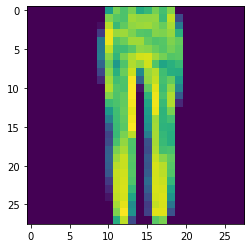

In [44]:
print(plt.imshow(X_test[1201]))

AxesImage(54,36;334.8x217.44)


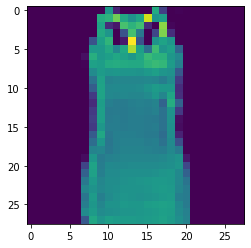

In [45]:
print(plt.imshow(X_test[1203]))

In [46]:
np.array(class_name)[y_pred]

array(['Sandal', 'Trouser', 'Trouser'], dtype='<U11')